In [1]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Twitter Api Credentials
consumerKey = "XhdYabVocmqWCex5hCD8jBD9h"
consumerSecret = "NRyh3oOKMDHgSBh7htAB3T8Uzii7ffL3EBsNM5LGLEvG1JZkq7"
accessToken = "1232645972313796609-6wXttbepUkycE9TFuRIaa3W9c5iLQy"
accessTokenSecret = "KDLUnTGBnAeqGa9cbUaNu0OAYXYLJQ4h9cyYgVz2Cyk5u"

# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)


In [6]:
# Extract 1000 tweets from the twitter user
posts = api.user_timeline(screen_name="Bukalapak", count = 1000, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) @anddrebaldhead Hai Kak, mohon maaf atas kendalanya. Bisa infokan nomor transaksi Kakak, ya (contoh: 201*********) atau nomor tagihan Kakak (contoh: BL201******INV) melalui DM ya kak agar dapat Bella bantu lakukan pengecekan lebih lanjut kendala kakak. :) ^IS

2) @LLLoserx https://t.co/IFTInfT5ub

3) @ruqoyyahalkhoir Langsung aja cuss, gampang banget caranya 👇https://t.co/sls8GluEOF

4) Langsung aja ikutan kuis di bawah ini, ada Bukalapak Credits untuk 5 orang yang beruntung 👇✨#BerkembangBersama https://t.co/sur3NboObo

5) @alisyanura Ashiaaaaaap



In [7]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 10 rows of data
df.head()

,Tweets
0,"@anddrebaldhead Hai Kak, mohon maaf atas kenda..."
1,@LLLoserx https://t.co/IFTInfT5ub
2,"@ruqoyyahalkhoir Langsung aja cuss, gampang ba..."
3,"Langsung aja ikutan kuis di bawah ini, ada Buk..."
4,@alisyanura Ashiaaaaaap


In [8]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,"Hai Kak, mohon maaf atas kendalanya. Bisa inf..."
1,
2,"Langsung aja cuss, gampang banget caranya 👇"
3,"Langsung aja ikutan kuis di bawah ini, ada Buk..."
4,Ashiaaaaaap
...,...
195,"88 Hai Kak, mohon maaf atas kendalanya. Yuk ka..."
196,"Hai kak , DM Bella di yuk! ^LLI"
197,4s_ Cieee cieee 😍
198,"Muehehe, sama dong!"


In [9]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,"Hai Kak, mohon maaf atas kendalanya. Bisa inf...",1.0,0.375
1,,0.0,0.000
2,"Langsung aja cuss, gampang banget caranya 👇",0.0,0.000
3,"Langsung aja ikutan kuis di bawah ini, ada Buk...",0.0,0.000
4,Ashiaaaaaap,0.0,0.000
...,...,...,...
195,"88 Hai Kak, mohon maaf atas kendalanya. Yuk ka...",1.0,0.375
196,"Hai kak , DM Bella di yuk! ^LLI",0.0,0.000
197,4s_ Cieee cieee 😍,0.0,0.000
198,"Muehehe, sama dong!",0.0,0.000


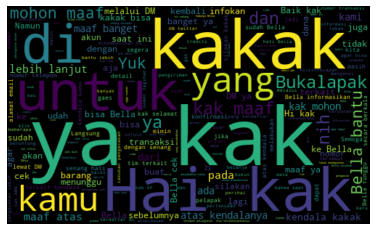

In [10]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [11]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):

    
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,"Hai Kak, mohon maaf atas kendalanya. Bisa inf...",1.0,0.375,Positive
1,,0.0,0.000,Neutral
2,"Langsung aja cuss, gampang banget caranya 👇",0.0,0.000,Neutral
3,"Langsung aja ikutan kuis di bawah ini, ada Buk...",0.0,0.000,Neutral
4,Ashiaaaaaap,0.0,0.000,Neutral
...,...,...,...,...
195,"88 Hai Kak, mohon maaf atas kendalanya. Yuk ka...",1.0,0.375,Positive
196,"Hai kak , DM Bella di yuk! ^LLI",0.0,0.000,Neutral
197,4s_ Cieee cieee 😍,0.0,0.000,Neutral
198,"Muehehe, sama dong!",0.0,0.000,Neutral


In [12]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets,Subjectivity,Polarity,Analysis
0,"Hai Kak, mohon maaf atas kendalanya. Bisa inf...",1.0,0.375,Positive
1,,0.0,0.000,Neutral
2,"Langsung aja cuss, gampang banget caranya 👇",0.0,0.000,Neutral
3,"Langsung aja ikutan kuis di bawah ini, ada Buk...",0.0,0.000,Neutral
4,Ashiaaaaaap,0.0,0.000,Neutral
...,...,...,...,...
195,"88 Hai Kak, mohon maaf atas kendalanya. Yuk ka...",1.0,0.375,Positive
196,"Hai kak , DM Bella di yuk! ^LLI",0.0,0.000,Neutral
197,4s_ Cieee cieee 😍,0.0,0.000,Neutral
198,"Muehehe, sama dong!",0.0,0.000,Neutral


In [13]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1)  Hai Kak, mohon maaf atas kendalanya. Bisa infokan nomor transaksi Kakak, ya (contoh: 201*********) atau nomor tagihan Kakak (contoh: BL201******INV) melalui DM ya kak agar dapat Bella bantu lakukan pengecekan lebih lanjut kendala kakak. :) ^IS

2) _koe Hai kak, maaf banget ya kak atas kendalanya. Bella sarankan untuk Kakak saat ini mengikuti Syarat dan Ketentuan yang berlaku ya. Namun Kakak tidak perlu khawatir, untuk kedepannya agar Bukalapak dapat memperbaiki promo-promo yang berjalan ya kak :) ^RSA

3)  Maaf sebelumnya ya Kak. Bella bantu informasikan nih Kak, jadi maksud dari blacklist yaitu sistemnya yang di blacklist ya bukan akun Kakak, Bella sarankan Kakak untuk bermain kembali pada 3x24 jam kedepan ya. :) ^EW

4) 80 Hai kak, mohon maaf atas kendalanya ya kak. Yuk infoin email dan nomor telepon kakak di DM ya biar bisa Bella cek lebih lanjut. :) ^SYAK

5)  Hai kak, mohon maaf sebelumnya, terkait pertanyaan kakak, yuk infokan link barang yang kakak

In [14]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1)  Hai Kak, duh maaf banget nih Kak jadi buat Kakak resah menunggu ya. Bella cek untuk nomer transaksi 203047387326 memang masih di proses oleh pelapak dari tanggal 01 Januari 2021 pukul 12:00 WIB ya Kak. Mohon kese.. 

2)  Hai Kak, duh maaf banget yah. Kakak gak perlu khawatir, Bella akan selalu membantu Kakak. Infoin ke Bella detail kendalanya di DM yuk Kak serta infokan juga alamat email dan nomor telepon yang terdaftar di akun Bukal.. 

3) _Hidayat Asik asik, lagi namatin game apa nih emangnya? 🎮

4) Besok udah long weekend lagi, rencana kamu mau ngapain nih? 👀



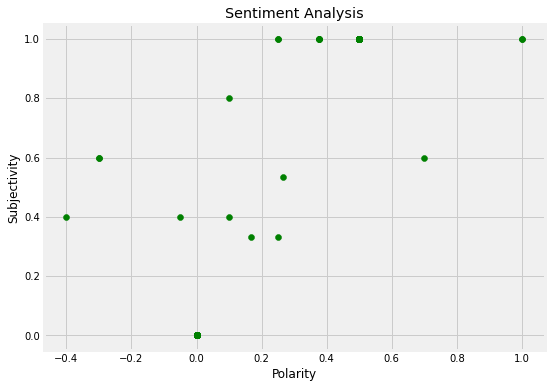

In [15]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Green') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [16]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

34.5

In [17]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)


2.0

In [18]:
# Show the value counts
df['Analysis'].value_counts()

Neutral     127
Positive     69
Negative      4
Name: Analysis, dtype: int64